## 필요한 라이브러리 install

In [ ]:
!pip install torch torchvision torchaudio tensorflow albumentations timm opencv-python matplotlib kagglehub pandas scikit-learn seaborn

## GPU 환경 설정

In [1]:
import tensorflow as tf

# GPU 0만 사용
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')  # GPU 0만 사용
        tf.config.experimental.set_memory_growth(gpus[0], True)  # 메모리 동적 할당
    except RuntimeError as e:
        print(e)

# TensorFlow에서 사용할 장치 확인
print(tf.config.experimental.list_logical_devices('GPU'))


2025-03-12 14:40:12.601783: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-12 14:40:12.615156: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-12 14:40:12.619266: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-12 14:40:12.630432: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-12 14:40:13.422731: W tensorflow/compiler/tf2

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


2025-03-12 14:40:14.912756: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20184 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:01:00.0, compute capability: 8.6


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"
# os.environ["CUDNN_PATH"] = "/usr/local/cuda"
# os.environ["LD_LIBRARY_PATH"] = "/usr/local/cuda/lib64"

# import tensorflow as tf
# print(tf.sysconfig.get_build_info()["cudnn_version"])  # 9.1.0 출력 확인

In [4]:
import tensorflow as tf
print(tf.sysconfig.get_build_info()["cudnn_version"])

8


## 데이터셋 합치기 + 불러오기

In [10]:
# 캐글 데이터셋 다운로드 라이브러리
import kagglehub

In [11]:
## face_data

# Download latest version
path1 = kagglehub.dataset_download("xhlulu/140k-real-and-fake-faces")

print("Path to dataset files:", path1)

Path to dataset files: /home/jangminoh_2/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2


In [12]:
## Dalle, midjourney

path4 = kagglehub.dataset_download("superpotato9/dalle-recognition-dataset")

print("Path to dataset files:", path4)

Path to dataset files: /home/jangminoh_2/.cache/kagglehub/datasets/superpotato9/dalle-recognition-dataset/versions/7


In [13]:
# Download latest version
path = kagglehub.dataset_download("yangsangtai/tiny-genimage")

print("Path to dataset files:", path)

Path to dataset files: /home/jangminoh_2/.cache/kagglehub/datasets/yangsangtai/tiny-genimage/versions/1


In [14]:
# Download latest version
path = kagglehub.dataset_download("tristanzhang32/ai-generated-images-vs-real-images")

print("Path to dataset files:", path)

Path to dataset files: /home/jangminoh_2/.cache/kagglehub/datasets/tristanzhang32/ai-generated-images-vs-real-images/versions/2


### 데이터셋 경로 설정

In [15]:
#face 데이터셋 경로 설정 #70,000 real & 70,000 fake
face_train_directory = "/home/jangminoh_2/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/train"
face_test_directory = "/home/jangminoh_2/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/test"

## dalle + midjourney #17855 & Real Images: 3780
fake_dir = "/home/jangminoh_2/.cache/kagglehub/datasets/superpotato9/dalle-recognition-dataset/versions/7/fakeV2/fake-v2"
real_dir = "/home/jangminoh_2/.cache/kagglehub/datasets/superpotato9/dalle-recognition-dataset/versions/7/real"

## gen : midjourney
gen_mid = "/home/jangminoh_2/.cache/kagglehub/datasets/yangsangtai/tiny-genimage/versions/1/imagenet_midjourney/train"
gen_sd = "/home/jangminoh_2/.cache/kagglehub/datasets/yangsangtai/tiny-genimage/versions/1/imagenet_ai_0424_sdv5/train"

gen_mid_fake1 = "/home/jangminoh_2/.cache/kagglehub/datasets/yangsangtai/tiny-genimage/versions/1/imagenet_ai_0424_sdv5/train/ai"
gen_mid_fake2 = "/home/jangminoh_2/.cache/kagglehub/datasets/yangsangtai/tiny-genimage/versions/1/imagenet_ai_0424_sdv5/val/ai"
gen_mid_real= "/home/jangminoh_2/.cache/kagglehub/datasets/yangsangtai/tiny-genimage/versions/1/imagenet_midjourney/train/nature"

# ## gen : stable diffusion
# gen_sd_fake = "/home/jangminoh_2/.cache/kagglehub/datasets/yangsangtai/tiny-genimage/versions/1/imagenet_ai_0424_sdv5/train/ai"
# gen_sd_real= "/home/jangminoh_2/.cache/kagglehub/datasets/yangsangtai/tiny-genimage/versions/1/imagenet_ai_0424_sdv5/train/nature"

# stable diffusion, dalle, midjourney
new_fake = "/home/jangminoh_2/.cache/kagglehub/datasets/tristanzhang32/ai-generated-images-vs-real-images/versions/2/train/fake"
new_real = "/home/jangminoh_2/.cache/kagglehub/datasets/tristanzhang32/ai-generated-images-vs-real-images/versions/2/train/real"

In [16]:
import os
# 디렉토리 리스트로 구성
directories = [
    face_train_directory,
    face_test_directory,
    fake_dir,
    real_dir,
    gen_mid,
    new_fake,
    new_real    
]

# 각 디렉토리에서 real과 fake 폴더의 구조 출력
for directory in directories:
    print(f"Checking directory structure for: {directory}")

    if os.path.exists(directory):
        for subdir in os.listdir(directory):
            subdir_path = os.path.join(directory, subdir)
            if os.path.isdir(subdir_path):
                print(f"  {subdir_path} exists as a directory")
    else:
        print(f"  {directory} does not exist")
    print("\n")

Checking directory structure for: /home/jangminoh_2/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/train
  /home/jangminoh_2/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/train/fake exists as a directory
  /home/jangminoh_2/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/train/real exists as a directory


Checking directory structure for: /home/jangminoh_2/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/test
  /home/jangminoh_2/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/test/fake exists as a directory
  /home/jangminoh_2/.cache/kagglehub/datasets/xhlulu/140k-real-and-fake-faces/versions/2/real_vs_fake/real-vs-fake/test/real exists as a directory


Checking directory structure for: /home/jangminoh_2/.cache/kagglehub/datasets/superpotato9/dalle-reco

In [17]:
import os
import pandas as pd
from IPython.display import display

# ✅ 이미지 확장자 목록
image_extensions = (".jpg", ".jpeg", ".png", ".bmp", ".tiff", ".webp", ".gif")

# ✅ 디렉토리 매핑 (fake/real 추가)
directories_with_labels = {
    "GAN_FaceData_train/fake": f"{face_train_directory}/fake",
    "GAN_FaceData_train/real": f"{face_train_directory}/real",
    "GAN_FaceData_test/fake": f"{face_test_directory}/fake",
    "GAN_FaceData_test/real": f"{face_test_directory}/real",
    "Midjourney&Dalle/fake":fake_dir,
    "Midjourney&Dalle/real":real_dir,
    
    ## 추가한 새로운 데이터
    "gen_dataset/midjourney/real":gen_mid_real,
    "gen_dataset/midjourney/fake": gen_mid_fake1,
    "gen_dataset/midjourney/fake": gen_mid_fake2,
    "gen_dataset/stable_diffusion/real": new_real,
    "gen_dataset/stable_diffusion/fake": new_fake,        
}

# ✅ 각 디렉토리 내 이미지 개수 확인
image_counts = {}

for label, directory in directories_with_labels.items():
    if os.path.exists(directory) and os.path.isdir(directory):
        image_counts[label] = sum(
            1 for f in os.listdir(directory) if f.lower().endswith(image_extensions)
        )
    else:
        image_counts[label] = "Directory not found"

# ✅ 결과 출력
df = pd.DataFrame(list(image_counts.items()), columns=["Directory", "Image Count"])

# Jupyter Notebook에서 보기 좋게 출력
display(df)


,Directory,Image Count
0,GAN_FaceData_train/fake,50000
1,GAN_FaceData_train/real,50000
2,GAN_FaceData_test/fake,10000
3,GAN_FaceData_test/real,10000
4,Midjourney&Dalle/fake,17855
5,Midjourney&Dalle/real,3780
6,gen_dataset/midjourney/real,2000
7,gen_dataset/midjourney/fake,500
8,gen_dataset/stable_diffusion/real,24000
9,gen_dataset/stable_diffusion/fake,24000


### 샘플링

In [22]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# 저장 디렉토리 설정
output_directory = "data/mixed_Dataset2.1"
train_dir = os.path.join(output_directory, "train")
test_dir = os.path.join(output_directory, "test")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

def sample_n_files(directory, n):
    """디렉토리에서 n개 파일을 랜덤 샘플링"""
    if not os.path.exists(directory) or not os.path.isdir(directory):
        print(f"❌ {directory} 경로가 존재하지 않음!")
        return []
    
    files = os.listdir(directory)
    if len(files) < n:
        print(f"⚠️ {directory}: 데이터 부족 ({len(files)}/{n}) → 모든 파일 사용")
        return [os.path.join(directory, f) for f in files]
    
    return [os.path.join(directory, f) for f in random.sample(files, n)]

def copy_files(files, target_dir):
    """파일 복사"""
    os.makedirs(target_dir, exist_ok=True)
    for file in files:
        destination = os.path.join(target_dir, os.path.basename(file))
        try:
            shutil.copy(file, destination)
        except Exception as e:
            print(f"❌ Error copying {file}: {e}")

# 데이터셋 샘플링
fake_files = []
real_files = []

# face 데이터셋
fake_files.extend(sample_n_files(os.path.join(face_train_directory, "fake"), 500))
real_files.extend(sample_n_files(os.path.join(face_train_directory, "real"), 500))

# dalle + midjourney 데이터셋
fake_files.extend(sample_n_files(fake_dir, 2500))
real_files.extend(sample_n_files(real_dir, 1000))

# gen 데이터셋: midjourney
fake_files.extend(sample_n_files(gen_mid_fake1, 2000))
fake_files.extend(sample_n_files(gen_mid_fake1, 500))
real_files.extend(sample_n_files(gen_mid_real, 2000))

# gen 데이터셋: stable_diffusion
fake_files.extend(sample_n_files(new_fake, 5500))
real_files.extend(sample_n_files(new_real, 7500))

# Train-Test Split (8:2)
print(f"📊 전체 Fake 데이터 개수: {len(fake_files)}")
print(f"📊 전체 Real 데이터 개수: {len(real_files)}")

fake_train, fake_test = train_test_split(fake_files, test_size=0.2, random_state=42)
real_train, real_test = train_test_split(real_files, test_size=0.2, random_state=42)

# 데이터 저장
copy_files(fake_train, os.path.join(train_dir, "fake"))
copy_files(real_train, os.path.join(train_dir, "real"))
copy_files(fake_test, os.path.join(test_dir, "fake"))
copy_files(real_test, os.path.join(test_dir, "real"))

print(f"\n📊 최종 데이터셋 크기:")
print(f"  🔹 Train - Fake: {len(fake_train)}, Real: {len(real_train)}")
print(f"  🔹 Test - Fake: {len(fake_test)}, Real: {len(real_test)}")
print("\n✅ 데이터셋 준비가 완료되었습니다!")


📊 전체 Fake 데이터 개수: 11000
📊 전체 Real 데이터 개수: 11000

📊 최종 데이터셋 크기:
  🔹 Train - Fake: 8800, Real: 8800
  🔹 Test - Fake: 2200, Real: 2200

✅ 데이터셋 준비가 완료되었습니다!


## EfficientNetb6로 데이터셋에 대해 detection(이진분류)태스크 수행

### 데이터셋 준비

In [5]:
train_dir = "data/mixed_Dataset2.1/train"
test_dir = "data/mixed_Dataset2.1/test"

In [6]:
import os

train_fake_dir = os.path.join(train_dir, "fake")
train_real_dir = os.path.join(train_dir, "real")
test_fake_dir = os.path.join(test_dir, "fake")
test_real_dir = os.path.join(test_dir, "real")

# 파일 개수 세기
train_fake_count = len(os.listdir(train_fake_dir))
train_real_count = len(os.listdir(train_real_dir))
test_fake_count = len(os.listdir(test_fake_dir))
test_real_count = len(os.listdir(test_real_dir))

# 출력
print(f"Train Fake: {train_fake_count}")
print(f"Train Real: {train_real_count}")
print(f"Test Fake: {test_fake_count}")
print(f"Test Real: {test_real_count}")

Train Fake: 8275
Train Real: 8676
Test Fake: 2161
Test Real: 2193


In [7]:
# from PIL import Image
# import os

# MAX_PIXELS = 178956970  # 허용되는 최대 픽셀 크기 (Pillow 기본값)
# VALID_EXTENSIONS = {".jpg", ".jpeg", ".png"}
# def remove_invalid_images(directory):
#     for root, _, files in os.walk(directory):
#         for file in files:
#             file_path = os.path.join(root, file)
#             if not any(file.lower().endswith(ext) for ext in VALID_EXTENSIONS):
#                 continue  # 유효한 확장자가 아니면 건너뜀
#             try:
#                 img = Image.open(file_path)
#                 img.verify()  # 손상 여부 확인
#                 if img.size[0] * img.size[1] > MAX_PIXELS:
#                     print(f"Removing oversized image: {file_path}")
#                     os.remove(file_path)
#             except (IOError, SyntaxError, Image.DecompressionBombError):
#                 print(f"Removing invalid image: {file_path}")
#                 os.remove(file_path)

# remove_invalid_images(train_dir)
# remove_invalid_images(test_dir)

In [8]:
# import os
# import numpy as np
# from tensorflow.keras.preprocessing.image import load_img, img_to_array
# from PIL import Image

# def safe_load_image(image_path):
#     """이미지를 로드하고 손상된 경우 삭제"""
#     try:
#         img = Image.open(image_path)
#         img.verify()  # 손상 여부 확인
#         img = load_img(image_path)  # Keras 방식으로 다시 로드
#         return img_to_array(img)  # NumPy 배열로 변환
#     except (OSError, IOError, Image.DecompressionBombError) as e:
#         print(f"Invalid image removed: {image_path} ({e})")
#         os.remove(image_path)  # 손상된 이미지 삭제
#         return None  # 무효 이미지

# def clean_directory(directory):
#     """디렉토리 내 모든 이미지를 검사하고 손상된 파일 제거"""
#     for root, _, files in os.walk(directory):
#         for file in files:
#             file_path = os.path.join(root, file)
#             if safe_load_image(file_path) is None:
#                 continue  # 손상된 이미지는 자동 삭제됨

# # 이미지 폴더 정리
# clean_directory(train_dir)
# clean_directory(test_dir)


### 학습 시작

In [9]:
#필수 라이브러리 임포트
import tensorflow as tf
from tensorflow.keras import layers, models,regularizers
from tensorflow.keras.applications import EfficientNetB6
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [10]:
# CONFIGURATION 설정
CONFIGURATION = {
    "BATCH_SIZE": 4,
    "IM_SIZE": 528,
    "LEARNING_RATE": 5e-4,
    "N_EPOCHS": 50,
    "DROPOUT_RATE": 0.2, #일반적으로 0.2~0.5
    "REGULARIZATION_RATE": 0.005,
    "N_DENSE_1": 1024,
    "NUM_CLASSES": 2,
    "CLASS_NAMES": ['fake', 'real']
}

In [11]:
## Layer 개수
n = 10 #20~25

In [12]:
#EfficientNetB0,B6 모델 구성
input_shape = (CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"], 3)

# EfficientNetB6 모델 불러오기
base_model = tf.keras.applications.EfficientNetB6(
    weights='imagenet',
    include_top=False,
    input_shape=input_shape
)

# EfficientNet의 마지막 n개 레이어만 학습 가능하도록 설정
for layer in base_model.layers[:-n]:  # 마지막 N개 레이어만 학습 가능
    layer.trainable = False
for layer in base_model.layers[-n:]:
    layer.trainable = True
    
#Sequential 모델 정의 및 추가 계층 설정
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(CONFIGURATION["DROPOUT_RATE"]),
    layers.Dense(CONFIGURATION["N_DENSE_1"], activation="relu",
                 kernel_regularizer=regularizers.l2(CONFIGURATION["REGULARIZATION_RATE"])),
    layers.Dropout(CONFIGURATION["DROPOUT_RATE"]),
    layers.Dense(1, activation="sigmoid")  #이진 분류
])


#모델 컴파일 (binary_crossentropy 사용)
loss_function = 'binary_crossentropy'
model.compile(optimizer=Adam(learning_rate=CONFIGURATION["LEARNING_RATE"]),
              loss=loss_function,
              metrics=['accuracy'])


In [13]:

#데이터 증강을 위한 ImageDataGenerator 사용
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,  # EfficientNet용 전처리
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.1,
    # fill_mode='reflect',
    # rotation_range=30
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input  # EfficientNet용 전처리
)

#학습 데이터 로드 및 전처리
#train_dataset
train_dataset = train_datagen.flow_from_directory(
    train_dir,  # 학습 데이터가 있는 디렉토리
    class_mode='binary',  # 이진 분류 (fake vs real)
    color_mode='rgb',
    batch_size=CONFIGURATION["BATCH_SIZE"],
    target_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=True
)

#val_dataset
val_dataset = val_datagen.flow_from_directory(
    test_dir,  # 검증 데이터가 있는 디렉토리
    class_mode='binary',  # 이진 분류 (fake vs real)
    color_mode='rgb',
    batch_size=1,  # 검증에서는 배치 크기를 1로 설정
    target_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    shuffle=False,  # 검증 데이터셋에서는 shuffle=False
    seed=99  # 동일한 검증 데이터를 항상 사용할 수 있도록 시드 설정
)

Found 16951 images belonging to 2 classes.
Found 4354 images belonging to 2 classes.


### 모델 저장

In [ ]:
#모델 컴파일
model.compile(optimizer=Adam(learning_rate=CONFIGURATION["LEARNING_RATE"]),
              loss='binary_crossentropy',  #이진 분류에 적합한 손실 함수
              metrics=['accuracy'])
#조기멈춤 도입
early_stopping = EarlyStopping(monitor='val_loss', #accuracy #val_loss
                               patience=5,           #N번의 에폭 동안 개선이 없으면 중단
                               restore_best_weights=True)  #중단된 지점에서 최적의 가중치로 복원

#모델 학습
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=CONFIGURATION["N_EPOCHS"],
    verbose=1,
    callbacks=[early_stopping]  # EarlyStopping 콜백 추가
)

#학습 과정 시각화
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Validation Loss'])
plt.show()

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1741758051.612370 3566543 service.cc:146] XLA service 0x7b4718003b50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741758051.612433 3566543 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
2025-03-12 14:40:52.308253: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-03-12 14:40:55.325915: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


   2/4238 ━━━━━━━━━━━━━━━━━━━━ 4:55 70ms/step - accuracy: 0.3125 - loss: 7.8201   

I0000 00:00:1741758079.889833 3566543 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1236/4238 ━━━━━━━━━━━━━━━━━━━━ 7:31 150ms/step - accuracy: 0.6762 - loss: 2.4427

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1860/4238 ━━━━━━━━━━━━━━━━━━━━ 5:35 141ms/step - accuracy: 0.6904 - loss: 1.9995

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (98806617 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


2187/4238 ━━━━━━━━━━━━━━━━━━━━ 4:48 140ms/step - accuracy: 0.6959 - loss: 1.8487

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (99991727 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


2454/4238 ━━━━━━━━━━━━━━━━━━━━ 4:10 140ms/step - accuracy: 0.7000 - loss: 1.7488

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/PIL/Image.py:3402: DecompressionBombWarning: Image size (107184040 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


4238/4238 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7195 - loss: 1.3564

2025-03-12 14:50:52.919562: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2', 36 bytes spill stores, 36 bytes spill loads



In [ ]:
#모델 저장
model.save("model/model_v1.h5")
#model.save("model/model_v3.h5", save_format='h5', include_optimizer=True)

NameError: name 'model' is not defined

- 모델 로드

In [22]:
# 모델 로드
from tensorflow.keras.models import load_model

model = load_model("model/model_v6.h5")

### 모델 평가

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

#모델 평가: validation dataset에 대한 정확도 계산
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")


#예측 및 실제 레이블을 추출하여 Confusion Matrix 계산
y_true = []
y_pred = []

#validation dataset에 대해 예측 수행
for images, labels in val_dataset:
    predictions = model.predict(images, verbose=0)#로그 출력 생략verbose=0
    print(predictions)
    y_true.extend(labels)  #실제 레이블
    y_pred.extend(np.round(predictions).astype(int))  #예측 레이블 (0 또는 1로 변환)

# #Confusion Matrix 계산
# cm = confusion_matrix(y_true, y_pred)

# #Confusion Matrix 시각화
# plt.figure(figsize=(6, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=CONFIGURATION["CLASS_NAMES"], yticklabels=CONFIGURATION["CLASS_NAMES"])
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

# #Confusion Matrix 출력
# print("Confusion Matrix:")
# print(cm)

 531/2588 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.7585 - loss: 0.7021

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


2588/2588 ━━━━━━━━━━━━━━━━━━━━ 78s 30ms/step - accuracy: 0.7968 - loss: 0.5655
Validation Accuracy: 84.58%
[[0.00539185]]
[[0.12102728]]
[[0.0217219]]
[[0.00372737]]
[[0.71529025]]
[[0.39277798]]
[[0.38754082]]
[[0.22826412]]
[[0.3067649]]
[[0.9346255]]
[[0.01093449]]
[[0.7362338]]
[[0.37514657]]
[[0.01825056]]
[[0.00520331]]
[[0.677478]]
[[0.00392907]]
[[0.81534463]]
[[0.28928807]]
[[0.00314535]]
[[0.01120607]]
[[0.26860255]]
[[0.9923873]]
[[0.00346284]]
[[0.18378311]]
[[0.07710338]]
[[0.01773727]]
[[0.00012273]]
[[0.14929755]]
[[0.6142427]]
[[0.00497112]]
[[0.16701469]]
[[0.00073754]]
[[6.9349684e-05]]
[[0.18975028]]
[[0.08196437]]
[[0.99741626]]
[[0.9364809]]
[[0.33852312]]
[[0.66593087]]
[[0.47232828]]
[[0.08595224]]
[[0.7329911]]
[[0.00036234]]
[[0.01218746]]
[[0.99681205]]
[[0.8099566]]
[[0.12987873]]
[[0.8438174]]
[[0.54247546]]
[[0.01241445]]
[[0.9061066]]
[[0.00125016]]
[[0.20036022]]
[[0.00288707]]
[[0.9692583]]
[[0.3717037]]
[[0.00135511]]
[[0.70180804]]
[[0.00039652]]
[[0.0

## 자체 데이터셋에 대하여 테스트

### 데이터셋 준비

In [20]:
# from PIL import Image
# import os

# MAX_PIXELS = 178956970  # 허용되는 최대 픽셀 크기 (Pillow 기본값)
# VALID_EXTENSIONS = {".jpg", ".jpeg", ".png"}
# def remove_invalid_images(directory):
#     for root, _, files in os.walk(directory):
#         for file in files:
#             file_path = os.path.join(root, file)
#             if not any(file.lower().endswith(ext) for ext in VALID_EXTENSIONS):
#                 continue  # 유효한 확장자가 아니면 건너뜀
#             try:
#                 img = Image.open(file_path)
#                 img.verify()  # 손상 여부 확인
#                 if img.size[0] * img.size[1] > MAX_PIXELS:
#                     print(f"Removing oversized image: {file_path}")
#                     os.remove(file_path)
#             except (IOError, SyntaxError, Image.DecompressionBombError):
#                 print(f"Removing invalid image: {file_path}")
#                 os.remove(file_path)

# remove_invalid_images(fake_dir)
# remove_invalid_images(real_dir)

### 평가 수행

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋 경로
dataset_dir = "data/gen_without_envir"
fake_dir = "data/gen_without_envir/fake"
real_dir = "data/gen_without_envir/real"

In [22]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 270, Real: 133


In [23]:
# 모델 로드
model_path = "model/model_v5.h5"
model = load_model(model_path, compile=True)

Found 398 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1741708423.127291 3532870 service.cc:146] XLA service 0x7b667c0053d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741708423.127337 3532870 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1741708423.127340 3532870 service.cc:154]   StreamExecutor device (1): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1741708423.127343 3532870 service.cc:154]   StreamExecutor device (2): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1741708423.127346 3532870 service.cc:154]   S

  7/398 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step   

I0000 00:00:1741708433.710249 3532870 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


398/398 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step
[[7.8221911e-01]
 [8.7705618e-01]
 [7.5708538e-01]
 [3.7027091e-01]
 [4.3376574e-01]
 [2.4568513e-01]
 [1.2186113e-01]
 [1.1617788e-01]
 [1.1818294e-01]
 [6.6673118e-01]
 [6.7333055e-01]
 [6.6098142e-01]
 [8.7676400e-01]
 [7.1145481e-01]
 [6.5535957e-01]
 [3.9337512e-02]
 [5.2297893e-03]
 [2.0266184e-01]
 [7.4829721e-01]
 [3.2500762e-01]
 [1.0775388e-02]
 [2.8774881e-01]
 [8.1312135e-03]
 [5.0901449e-01]
 [3.1174032e-02]
 [1.1508236e-02]
 [2.3218551e-01]
 [1.6471653e-01]
 [9.8585480e-01]
 [8.9878333e-01]
 [1.7455414e-01]
 [8.9614922e-01]
 [4.4213954e-01]
 [7.2249152e-02]
 [8.2668418e-01]
 [8.9237267e-01]
 [7.0789441e-02]
 [3.4393820e-03]
 [9.9971944e-01]
 [7.0634291e-02]
 [4.6608727e-02]
 [9.2945574e-03]
 [5.2174341e-02]
 [3.1089669e-01]
 [6.8516202e-02]
 [9.8885405e-01]
 [9.6382838e-01]
 [6.3562483e-02]
 [2.3322238e-02]
 [7.2989172e-01]
 [3.6899500e-02]
 [9.9943823e-01]
 [9.9734277e-01]
 [1.0434911e-01]
 [6.8145186e-01]
 [8.3656329e-01]
 [1.7

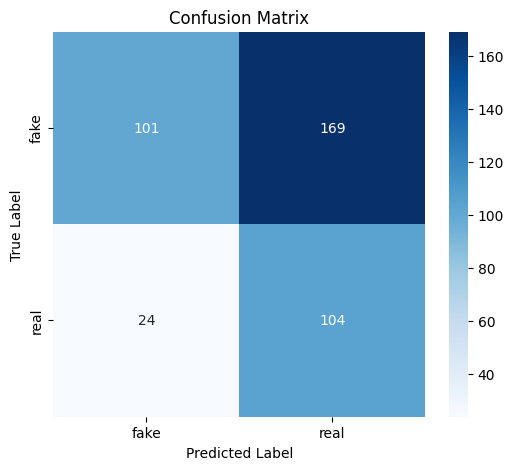


Classification Report:
              precision    recall  f1-score   support

        fake       0.81      0.37      0.51       270
        real       0.38      0.81      0.52       128

    accuracy                           0.52       398
   macro avg       0.59      0.59      0.52       398
weighted avg       0.67      0.52      0.51       398



In [13]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


## 자체 환경 데이터셋 추가 후, 테스트

### 자체 데이터셋 준비

In [14]:
import os

dataset_dir = "data/generated_dataset/labeled"
fake_dir = os.path.join(dataset_dir, "fake")
real_dir = os.path.join(dataset_dir, "real")

fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")


Fake: 350, Real: 175


### 자체데이터 평가 수행

In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 데이터셋 경로
dataset_dir = "data/generated_dataset/labeled"
fake_dir = "data/generated_dataset/labeled/fake"
real_dir = "data/generated_dataset/labeled/real"

In [16]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 350, Real: 175


In [18]:
# 모델 로드
model_path = "model/model_v5.h5"
model = load_model(model_path)

Found 520 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


520/520 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step
[[9.88336146e-01]
 [7.49939620e-01]
 [9.86264110e-01]
 [2.15869337e-01]
 [6.30144477e-01]
 [1.01773791e-01]
 [9.44168210e-01]
 [1.64693639e-01]
 [9.54734445e-01]
 [9.36720371e-01]
 [1.87492501e-02]
 [2.82353535e-02]
 [2.51319688e-02]
 [5.98950505e-01]
 [1.91019252e-01]
 [6.18187904e-01]
 [7.42885470e-01]
 [1.03995726e-01]
 [4.41204935e-01]
 [9.23493743e-01]
 [8.69769990e-01]
 [1.41246128e-04]
 [2.33917207e-01]
 [4.47571240e-02]
 [3.29333782e-01]
 [2.48618349e-02]
 [1.57989755e-01]
 [6.78858817e-01]
 [6.38735220e-02]
 [5.72605915e-02]
 [7.82219112e-01]
 [8.77056181e-01]
 [7.57085383e-01]
 [3.70270908e-01]
 [5.77807307e-01]
 [9.99277294e-01]
 [7.42335543e-02]
 [9.64645922e-01]
 [9.99070108e-01]
 [9.79187489e-01]
 [4.29678679e-01]
 [9.98085499e-01]
 [9.79579568e-01]
 [9.99908566e-01]
 [9.43340480e-01]
 [6.22762293e-02]
 [9.79423463e-01]
 [7.36275256e-01]
 [8.77289414e-01]
 [7.37516999e-01]
 [9.95632470e-01]
 [2.84279659e-02]
 [1.67625532e-01]
 [1

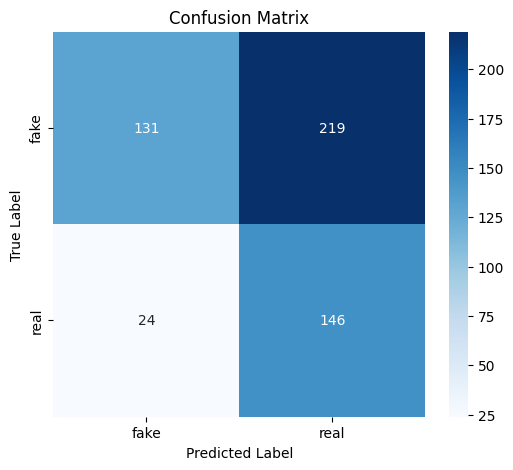


Classification Report:
              precision    recall  f1-score   support

        fake       0.85      0.37      0.52       350
        real       0.40      0.86      0.55       170

    accuracy                           0.53       520
   macro avg       0.62      0.62      0.53       520
weighted avg       0.70      0.53      0.53       520



In [19]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


## 저장된 모델 로딩 -> 자체이미지 데이터셋에서 학습 후 이진분류

In [2]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt

import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

2025-02-27 23:53:57.407735: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-27 23:53:57.421753: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-27 23:53:57.426212: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-27 23:53:57.438840: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-27 23:53:58.304472: W tensorflow/compiler/tf2

In [3]:
train_dir = "data/generated_dataset/train_new"
test_dir = "data/generated_dataset/test_new"

### train, test 데이터셋 준비

In [ ]:
# # 데이터 경로 (가정: images 폴더에 fake와 real 이미지들이 있음)
# dataset_dir = "data/generated_dataset"
# fake_dir = os.path.join(dataset_dir, "fake")
# real_dir = os.path.join(dataset_dir, "real")

# # Train-Test Split을 위한 디렉토리 생성
# train_dir = "data/generated_dataset/train_new"
# test_dir = "data/generated_dataset/test_new"
# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# train_fake_dir = os.path.join(train_dir, "fake")
# test_fake_dir = os.path.join(test_dir, "fake")
# train_real_dir = os.path.join(train_dir, "real")
# test_real_dir = os.path.join(test_dir, "real")

# os.makedirs(train_fake_dir, exist_ok=True)
# os.makedirs(test_fake_dir, exist_ok=True)
# os.makedirs(train_real_dir, exist_ok=True)
# os.makedirs(test_real_dir, exist_ok=True)

# # 이미지 파일 리스트 가져오기
# fake_files = [os.path.join(fake_dir, f) for f in os.listdir(fake_dir) if os.path.isfile(os.path.join(fake_dir, f))]
# real_files = [os.path.join(real_dir, f) for f in os.listdir(real_dir) if os.path.isfile(os.path.join(real_dir, f))]

# # train-test split (80% train, 20% test)
# fake_train, fake_test = train_test_split(fake_files, test_size=0.2, random_state=42)
# real_train, real_test = train_test_split(real_files, test_size=0.2, random_state=42)

# # 파일 이동
# for file in fake_train:
#     shutil.copy(file, train_fake_dir)
# for file in fake_test:
#     shutil.copy(file, test_fake_dir)
# for file in real_train:
#     shutil.copy(file, train_real_dir)
# for file in real_test:
#     shutil.copy(file, test_real_dir)

# print("데이터셋 분할 완료!")


데이터셋 분할 완료!


In [ ]:
# from PIL import Image
# import os

# MAX_PIXELS = 178956970  # 허용되는 최대 픽셀 크기 (Pillow 기본값)
# VALID_EXTENSIONS = {".jpg", ".jpeg", ".png"}
# def remove_invalid_images(directory):
#     for root, _, files in os.walk(directory):
#         for file in files:
#             file_path = os.path.join(root, file)
#             if not any(file.lower().endswith(ext) for ext in VALID_EXTENSIONS):
#                 continue  # 유효한 확장자가 아니면 건너뜀
#             try:
#                 img = Image.open(file_path)
#                 img.verify()  # 손상 여부 확인
#                 if img.size[0] * img.size[1] > MAX_PIXELS:
#                     print(f"Removing oversized image: {file_path}")
#                     os.remove(file_path)
#             except (IOError, SyntaxError, Image.DecompressionBombError):
#                 print(f"Removing invalid image: {file_path}")
#                 os.remove(file_path)

# remove_invalid_images(train_dir)
# remove_invalid_images(test_dir)

In [50]:
import os

train_fake_dir = os.path.join(train_dir, "fake")
train_real_dir = os.path.join(train_dir, "real")
test_fake_dir = os.path.join(test_dir, "fake")
test_real_dir = os.path.join(test_dir, "real")

train_fake_count = len(os.listdir(train_fake_dir)) if os.path.exists(train_fake_dir) else 0
train_real_count = len(os.listdir(train_real_dir)) if os.path.exists(train_real_dir) else 0
test_fake_count = len(os.listdir(test_fake_dir)) if os.path.exists(test_fake_dir) else 0
test_real_count = len(os.listdir(test_real_dir)) if os.path.exists(test_real_dir) else 0

print(train_fake_count,train_real_count,test_fake_count,test_real_count )
print(f"Fake: {train_fake_count + test_fake_count}, Real: {train_real_count + test_real_count}")


280 140 70 35
Fake: 350, Real: 175


### 학습

In [4]:
#저장된 EfficientNetB6 모델 로드
model_path = "model/model_v7.h5"
model = load_model(model_path)

2025-02-27 23:54:20.300653: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22495 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:01:00.0, compute capability: 8.6
2025-02-27 23:54:20.302012: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 22495 MB memory:  -> device: 1, name: NVIDIA RTX A5000, pci bus id: 0000:21:00.0, compute capability: 8.6
2025-02-27 23:54:20.303176: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 22495 MB memory:  -> device: 2, name: NVIDIA RTX A5000, pci bus id: 0000:41:00.0, compute capability: 8.6
2025-02-27 23:54:20.304278: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 22495 MB memory:  -> device: 3, name: NVIDIA RTX A5000, pci bus id: 0000:61:00.0, 

In [5]:
#하이퍼파라미터 설정
CONFIGURATION = {
    "BATCH_SIZE": 4,
    "IM_SIZE": 528,  # EfficientNetB6의 입력 크기
    "LEARNING_RATE": 1e-4,
    "N_EPOCHS": 10,
    "DROPOUT_RATE": 0.2,
    "REGULARIZATION_RATE": 0.001,
    "N_DENSE_1": 1024,
    "CLASS_NAMES": ["fake", "real"]
}

n = 1
for layer in model.layers[:-n]:
    layer.trainable = False
for layer in model.layers[-n:]:
    layer.trainable = True

Found 415 images belonging to 2 classes.
Found 105 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1740668078.358736  706812 service.cc:146] XLA service 0x7ed8240c91f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740668078.358777  706812 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1740668078.358781  706812 service.cc:154]   StreamExecutor device (1): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1740668078.358785  706812 service.cc:154]   StreamExecutor device (2): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1740668078.358789  706812 service.cc:154]   StreamExecutor device (3): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1740668078.358794  706812 service.cc:154]   StreamExecutor device (4): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1740668078.358804  706812 service.cc:154]   StreamExecutor device (5): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1740668078.358809  706812 service.cc:154]   StreamExecutor device (6): NVID

  2/104 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.5625 - loss: 1.0335    

I0000 00:00:1740668104.195077  706812 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.5844 - loss: 0.9543

2025-02-27 23:55:58.861923: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2', 36 bytes spill stores, 36 bytes spill loads



104/104 ━━━━━━━━━━━━━━━━━━━━ 104s 617ms/step - accuracy: 0.5846 - loss: 0.9538 - val_accuracy: 0.5524 - val_loss: 1.0071
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - accuracy: 0.5845 - loss: 0.9364 - val_accuracy: 0.5619 - val_loss: 0.9762
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 20s 187ms/step - accuracy: 0.5908 - loss: 0.8363 - val_accuracy: 0.5524 - val_loss: 0.9489
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 180ms/step - accuracy: 0.6107 - loss: 0.8629 - val_accuracy: 0.5429 - val_loss: 0.9210
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 182ms/step - accuracy: 0.6175 - loss: 0.8876 - val_accuracy: 0.5333 - val_loss: 0.8967
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - accuracy: 0.5881 - loss: 0.8786 - val_accuracy: 0.5333 - val_loss: 0.8718
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.5711 - loss: 0.9040 - val_accuracy: 0.5333 - val_loss: 0.8488
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 19s 183ms/step - accuracy: 0.6295 - loss: 0.8034 - va

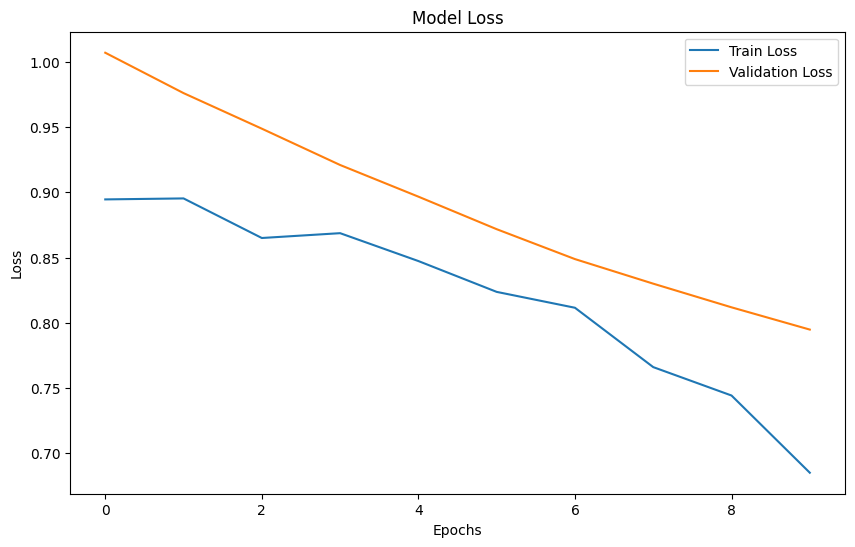

In [6]:
#데이터 증강 및 로드
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,  # EfficientNet용 전처리
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.1,
    fill_mode='reflect',
    rotation_range=30
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator( preprocessing_function=tf.keras.applications.efficientnet.preprocess_input,)

train_dataset = train_datagen.flow_from_directory(
    train_dir,
    target_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    batch_size=CONFIGURATION["BATCH_SIZE"],
    class_mode='binary'
)
val_dataset = val_datagen.flow_from_directory(
    test_dir,
    target_size=(CONFIGURATION["IM_SIZE"], CONFIGURATION["IM_SIZE"]),
    batch_size=CONFIGURATION["BATCH_SIZE"],
    class_mode='binary',
    shuffle=False,
    seed = 99
)

#모델 컴파일
model.compile(optimizer=Adam(learning_rate=CONFIGURATION["LEARNING_RATE"]),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

#모델 학습
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=CONFIGURATION["N_EPOCHS"],
    callbacks=[early_stopping],
    verbose=1
)

#학습 과정 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#모델 저장
import tensorflow as tf

model.save("model/final_model_v7.keras")  # 최신 Keras 형식 사용
#model.save("model/final_model_v7.h5", save_format="h5")


TypeError: cannot pickle 'module' object

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 모델 평가: Validation 데이터셋에 대한 정확도 계산
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# 예측 및 실제 레이블 추출
y_true = []
y_pred = []

# Validation 데이터셋에서 예측 수행
for images, labels in val_dataset:
    predictions = model.predict(images, verbose=0)  # 로그 출력 생략
    y_true.extend(labels)  # 실제 레이블
    y_pred.extend(np.round(predictions).flatten())  # 예측 레이블 (0 또는 1로 변환)

# Confusion Matrix 계산
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=CONFIGURATION["CLASS_NAMES"],
    yticklabels=CONFIGURATION["CLASS_NAMES"],
)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Confusion Matrix 출력
print("Confusion Matrix:")
print(cm)


27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.4942 - loss: 0.9055
Validation Accuracy: 52.38%
